<a href="https://colab.research.google.com/github/lpriyaa/dataweb/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depressed or Not 

In [ ]:
#dataset link https://www.kaggle.com/datasets/msambare/fer2013

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2

# define the data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# load the data using the data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Ajay_IT/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Ajay_IT/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation')

# define the base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

# add additional layers to the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze some layers in the base model for fine-tuning
for layer in base_model.layers[:249]:
    layer.trainable = False

# compile the model with the optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# fine-tune the model
history = model.fit(train_generator,
                    epochs=60,
                    validation_data=validation_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    validation_steps=validation_generator.samples/validation_generator.batch_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Ajay_IT/test', 
                                                  target_size=(224, 224), 
                                                  batch_size=64, 
                                                  class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc*100)


23/23 [==============================] - 18s 712ms/step


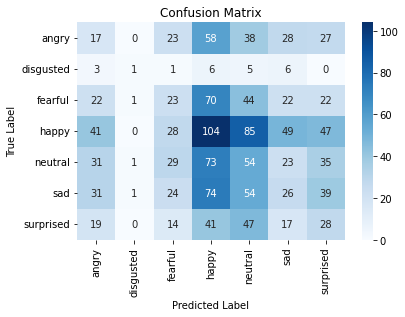

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
# Make predictions on validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot confusion matrix
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

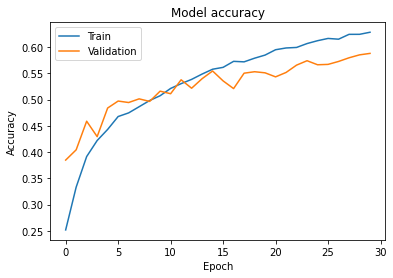

In [ ]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

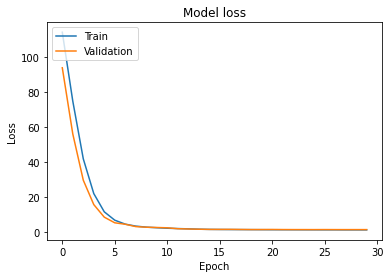

In [ ]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Ajay_IT/inceptionv3model.h5')
model.save_weights('/content/drive/MyDrive/Ajay_IT/weightsinceptionv3')

1/1 [==============================] - 1s 1s/step
Predicted class: sad


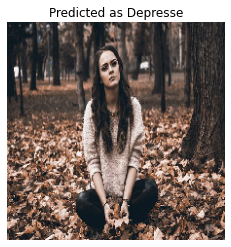

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Ajay_IT/inceptionv3model.h5')

# Load the custom image and resize it to the input shape of the model
#img = image.load_img('/content/drive/MyDrive/Ajay_IT/test/sad/im1006.png', target_size=(224, 224))

img = image.load_img('/sad-2042536__480.jpg', target_size=(224, 224))
# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Reshape the image array to have a batch size of 1
img_batch = np.expand_dims(img_array, axis=0)

# Normalize the pixel values between 0 and 1
img_batch = img_batch / 255.

# Predict the class probabilities for the image
preds = model.predict(img_batch)

# Get the class label with the highest probability
class_idx = np.argmax(preds[0])
class_label = {0: 'angry', 1: 'disgusted', 2: 'fearful', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'}

# Print the predicted class label
print('Predicted class:', class_label[class_idx])


if(class_label[class_idx])=='sad' :
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.title('Predicted as Depresse')
  plt.axis('off')
  plt.show()
  



In [ ]:
print(class_label)

{0: 'angry', 1: 'disgusted', 2: 'fearful', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'}


 ImageDataGenerator class in Keras, which is used to apply various data augmentation techniques to the training images. Here's a brief explanation of each argument:

rescale=1./255: Rescale the pixel values of the input images to a range of 0-1, by dividing each pixel value by 255.

rotation_range=30: Rotate the images randomly by up to 30 degrees.

width_shift_range=0.2: Shift the images horizontally by up to 20% of the image width.

height_shift_range=0.2: Shift the images vertically by up to 20% of the image height.

shear_range=0.2: Shear the images randomly by up to 20%.

zoom_range=0.2: Zoom the images randomly by up to 20%.

horizontal_flip=True: Flip the images horizontally at random.

validation_split=0.2: Reserve 20% of the training data for validation.
s
By applying these data augmentation techniques, the model is exposed to more variations of the training data, which can help improve its performance and robustness.

The class_mode argument is used when creating a DirectoryIterator or DataFrameIterator object in Keras, which is used to read the image data from a directory or a pandas DataFrame. The class_mode argument specifies the type of labels to be generated for the images. In this case, class_mode='categorical' means that the labels for each image will be represented as a one-hot encoded vector.



For example, suppose there are 3 classes of images: "cat", "dog", and "bird". If an image is a "dog", its label will be represented as a vector [0, 1, 0], where the "dog" class is assigned a value of 1, and all other classes are assigned a value of 0.




The class_mode argument can also take other values, such as "binary", "sparse", "input", "multi_output", or a custom generator function. The choice of class_mode depends on the problem at hand and the format of the labels.

a base model, InceptionV3, is loaded from the Keras applications module. This model is pre-trained on the ImageNet dataset, which is a large-scale visual recognition challenge dataset. The include_top parameter is set to False, which means that the top layers of the model, which correspond to the classification layer, are not included.

After loading the base model, additional layers are added to it. The x variable is assigned the output of the base model. This output is passed through a GlobalAveragePooling2D layer, which computes the spatial average of the entire feature map and outputs a fixed-length vector. This vector is then passed through a Dense layer with 2048 units and a ReLU activation function, followed by a BatchNormalization layer and a Dropout layer with a rate of 0.5. These layers help to prevent overfitting and improve the performance of the model.

The output of this layer is then passed through another Dense layer with 1024 units and a ReLU activation function, followed by another BatchNormalization layer and Dropout layer with a rate of 0.5. Finally, the output is passed through a Dense layer with 7 units and a softmax activation function. This last layer produces the predicted probabilities for each of the 7 classes of the problem at hand.